# Demo Geopandas

In [16]:
import geopandas as gpd

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<Axes: >

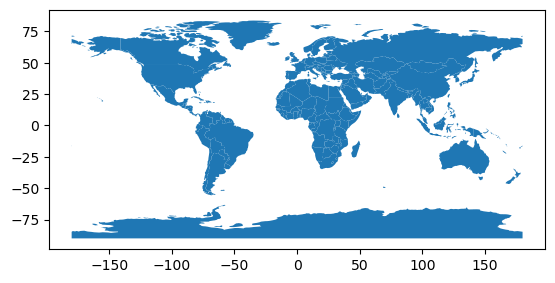

In [18]:
world.plot()

In [10]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [19]:
world['gdp_per_capital'] = world['gdp_md_est'] / world['pop_est']

<Axes: >

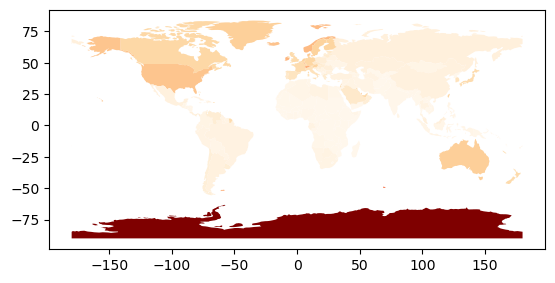

In [21]:
world.plot(column='gdp_per_capital', cmap='OrRd')

# CBS WijkBuurtKaart

In [24]:
filename = '../datasets/CBS Wijkbuurtkaart/gemeenten_2023_v1.shp'

In [27]:
gemeenten = gpd.read_file(filename)

<Axes: >

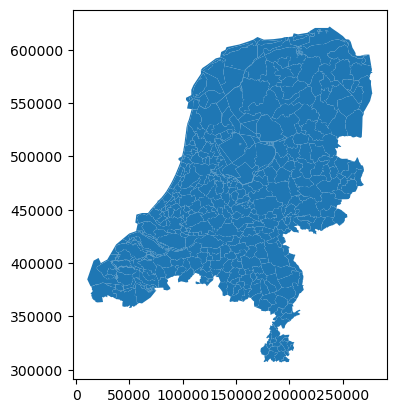

In [28]:
gemeenten.plot()

In [30]:
gemeenten.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GM_CODE     424 non-null    object  
 1   GM_NAAM     424 non-null    object  
 2   H2O         424 non-null    object  
 3   OAD         424 non-null    float64 
 4   STED        424 non-null    float64 
 5   BEV_DICHTH  424 non-null    float64 
 6   AANT_INW    424 non-null    float64 
 7   AANT_MAN    424 non-null    float64 
 8   AANT_VROUW  424 non-null    float64 
 9   P_00_14_JR  424 non-null    float64 
 10  P_15_24_JR  424 non-null    float64 
 11  P_25_44_JR  424 non-null    float64 
 12  P_45_64_JR  424 non-null    float64 
 13  P_65_EO_JR  424 non-null    float64 
 14  P_ONGEHUWD  424 non-null    float64 
 15  P_GEHUWD    424 non-null    float64 
 16  P_GESCHEID  424 non-null    float64 
 17  P_VERWEDUW  424 non-null    float64 
 18  AANTAL_HH   424 non-null    float64 
 19  

In [36]:
gemeenten = gemeenten.loc[gemeenten['H2O']=='NEE']

<Axes: >

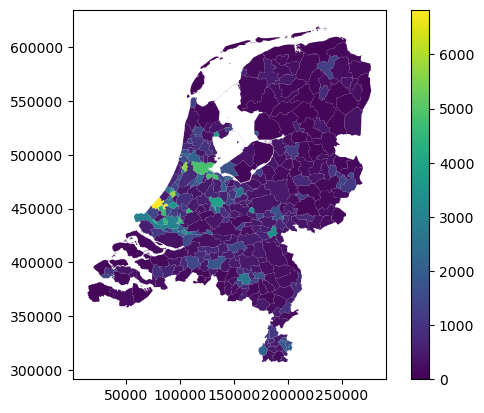

In [38]:
gemeenten.plot(column='BEV_DICHTH', legend=True)

In [45]:
gemeenten.sort_values('BEV_DICHTH', ascending=False).head(10)[['GM_CODE', 'GM_NAAM', 'BEV_DICHTH']]

,GM_CODE,GM_NAAM,BEV_DICHTH
228,GM0518,'s-Gravenhage,6827.0
235,GM0546,Leiden,5816.0
196,GM0392,Haarlem,5662.0
187,GM0363,Amsterdam,4880.0
223,GM0502,Capelle aan den IJssel,4777.0
224,GM0503,Delft,4681.0
227,GM0513,Gouda,4565.0
247,GM0606,Schiedam,4528.0
238,GM0556,Maassluis,4180.0
246,GM0603,Rijswijk,4150.0


In [46]:
gemeenten.sort_values('BEV_DICHTH', ascending=True).head(10)[['GM_CODE', 'GM_NAAM', 'BEV_DICHTH']]

,GM_CODE,GM_NAAM,BEV_DICHTH
334,GM0998,Buitenland,0.0
93,GM0088,Schiermonnikoog,23.0
96,GM0096,Vlieland,31.0
95,GM0093,Terschelling,57.0
151,GM0277,Rozendaal,63.0
87,GM0060,Ameland,68.0
359,GM1701,Westerveld,71.0
365,GM1714,Sluis,83.0
213,GM0448,Texel,86.0
355,GM1695,Noord-Beveland,91.0


In [50]:
gemeenten['man_vrouw'] = gemeenten['AANT_MAN'] / gemeenten['AANT_VROUW']

<Axes: >

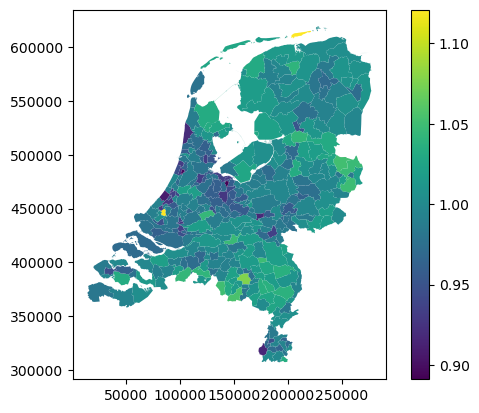

In [51]:
gemeenten.plot(column='man_vrouw', legend=True)

In [54]:
gemeenten.sort_values('man_vrouw', ascending=False)[['GM_CODE','GM_NAAM','man_vrouw']].head(10)

,GM_CODE,GM_NAAM,man_vrouw
93,GM0088,Schiermonnikoog,1.120950
224,GM0503,Delft,1.120278
282,GM0772,Eindhoven,1.077587
369,GM1724,Bergeijk,1.055334
119,GM0183,Tubbergen,1.050968
348,GM1667,Reusel-De Mierden,1.050886
275,GM0755,Boekel,1.048633
107,GM0153,Enschede,1.048495
380,GM1774,Dinkelland,1.046919
144,GM0263,Maasdriel,1.046885


In [55]:
gemeenten.sort_values('man_vrouw', ascending=True)[['GM_CODE','GM_NAAM','man_vrouw']].head(10)

,GM_CODE,GM_NAAM,man_vrouw
206,GM0417,Laren,0.891167
199,GM0397,Heemstede,0.898053
253,GM0629,Wassenaar,0.908764
320,GM0935,Maastricht,0.915564
155,GM0289,Wageningen,0.916885
188,GM0373,Bergen (NH.),0.919862
234,GM0542,Krimpen aan den IJssel,0.926477
166,GM0310,De Bilt,0.927865
246,GM0603,Rijswijk,0.928348
397,GM1916,Leidschendam-Voorburg,0.928493


In [61]:
columns = ['GM_CODE',
           'GM_NAAM',
           'man_vrouw', 
           'P_00_14_JR',
           'P_15_24_JR',
           'P_25_44_JR',
           'P_45_64_JR',
           'P_65_EO_JR',
           'P_ONGEHUWD',
           'P_GEHUWD',
           'P_GESCHEID',
           'P_VERWEDUW']

gemeenten.sort_values('man_vrouw', ascending=True)[columns].head(10)

,GM_CODE,GM_NAAM,man_vrouw,P_00_14_JR,P_15_24_JR,P_25_44_JR,P_45_64_JR,P_65_EO_JR,P_ONGEHUWD,P_GEHUWD,P_GESCHEID,P_VERWEDUW
206,GM0417,Laren,0.891167,16.0,9.0,15.0,28.0,32.0,42.0,40.0,10.0,8.0
199,GM0397,Heemstede,0.898053,18.0,9.0,18.0,27.0,27.0,46.0,39.0,8.0,6.0
253,GM0629,Wassenaar,0.908764,16.0,12.0,17.0,30.0,25.0,44.0,42.0,8.0,6.0
320,GM0935,Maastricht,0.915564,10.0,20.0,24.0,23.0,22.0,55.0,31.0,9.0,5.0
155,GM0289,Wageningen,0.916885,12.0,22.0,29.0,21.0,17.0,61.0,29.0,6.0,4.0
188,GM0373,Bergen (NH.),0.919862,11.0,10.0,15.0,30.0,33.0,42.0,42.0,9.0,7.0
234,GM0542,Krimpen aan den IJssel,0.926477,17.0,12.0,21.0,25.0,25.0,43.0,44.0,7.0,6.0
166,GM0310,De Bilt,0.927865,17.0,11.0,20.0,27.0,24.0,47.0,39.0,8.0,6.0
246,GM0603,Rijswijk,0.928348,18.0,9.0,28.0,24.0,21.0,51.0,35.0,9.0,5.0
397,GM1916,Leidschendam-Voorburg,0.928493,16.0,10.0,24.0,26.0,23.0,49.0,37.0,9.0,5.0


In [62]:
gemeenten.sort_values('man_vrouw', ascending=False)[columns].head(10)

,GM_CODE,GM_NAAM,man_vrouw,P_00_14_JR,P_15_24_JR,P_25_44_JR,P_45_64_JR,P_65_EO_JR,P_ONGEHUWD,P_GEHUWD,P_GESCHEID,P_VERWEDUW
93,GM0088,Schiermonnikoog,1.120950,9.0,10.0,22.0,29.0,30.0,46.0,38.0,10.0,6.0
224,GM0503,Delft,1.120278,12.0,20.0,30.0,22.0,16.0,61.0,28.0,7.0,4.0
282,GM0772,Eindhoven,1.077587,14.0,14.0,32.0,23.0,16.0,57.0,31.0,8.0,4.0
369,GM1724,Bergeijk,1.055334,14.0,11.0,22.0,29.0,24.0,43.0,45.0,7.0,5.0
119,GM0183,Tubbergen,1.050968,15.0,14.0,21.0,29.0,21.0,46.0,44.0,4.0,6.0
348,GM1667,Reusel-De Mierden,1.050886,17.0,10.0,24.0,27.0,22.0,46.0,44.0,5.0,5.0
275,GM0755,Boekel,1.048633,16.0,13.0,24.0,28.0,20.0,48.0,42.0,5.0,5.0
107,GM0153,Enschede,1.048495,14.0,16.0,26.0,25.0,18.0,54.0,33.0,8.0,5.0
380,GM1774,Dinkelland,1.046919,14.0,13.0,21.0,29.0,24.0,45.0,45.0,4.0,6.0
144,GM0263,Maasdriel,1.046885,15.0,12.0,24.0,30.0,20.0,46.0,42.0,7.0,5.0
